In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## regresyon problemleri için : 

## SSE :108308(SUM OF SQUARED ERROR) 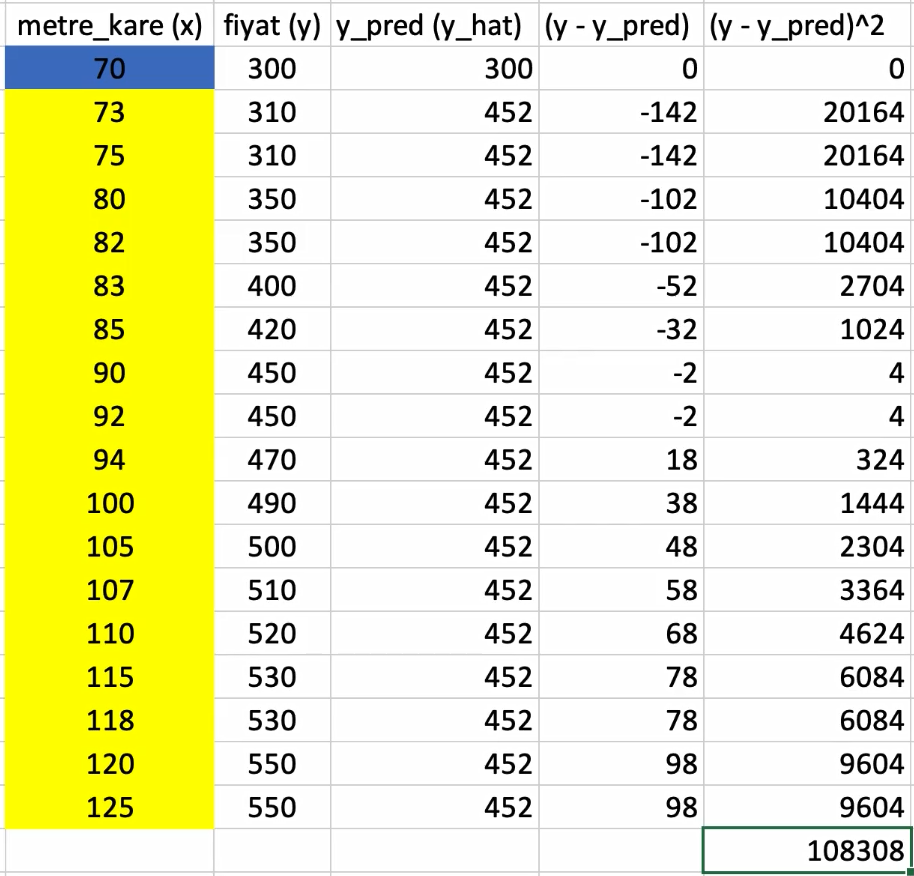

y_pred -------> aslında ortalamadır. 
## bölme noktaları değiştikçe hatam değişiyor ve bende buna göre nereden böleceğime karar vereceğim.

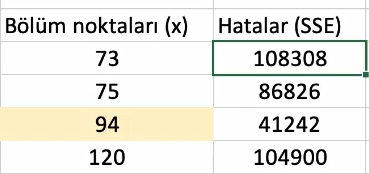

## en düşük SSE 94'ten bölününce alındığına göre buradan bölmeliyiz diyoruz.

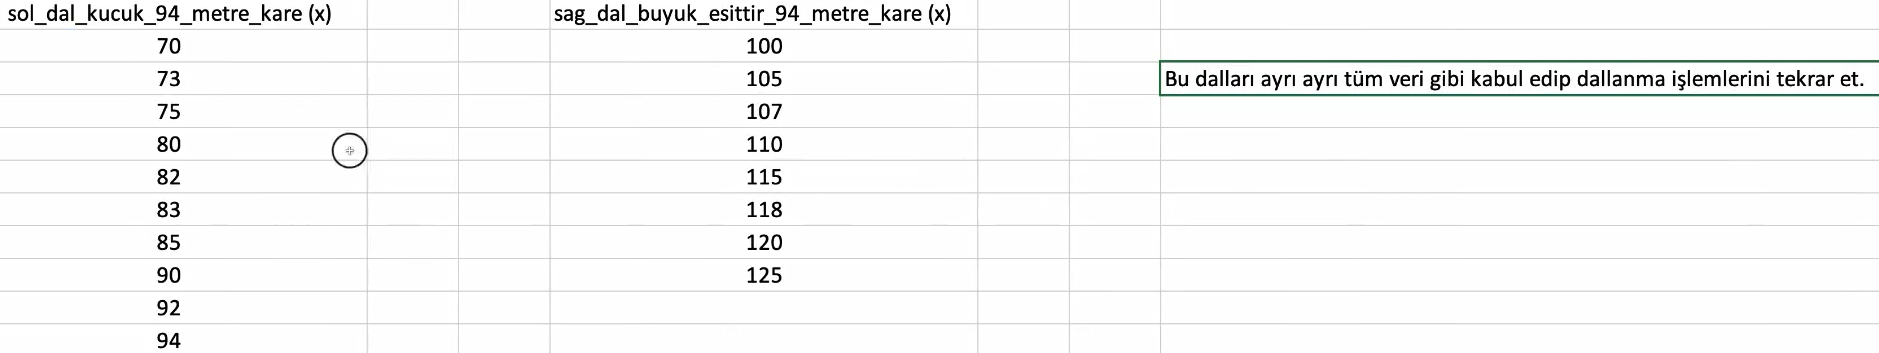

### Regresyon problemleri için, bölmeleri seçmek için varyansı kullanırız ve bölme noktasının her iki tarafındaki varyansları hesaplarız. Karar ağacı, yaprakların varyansını mümkün olduğunca en aza indirmeye çalışır.(pre-class)

### sınıflandırma problemleri için :  gini katsayısı veya entropiye göre dallandırmaları yapacağız: 

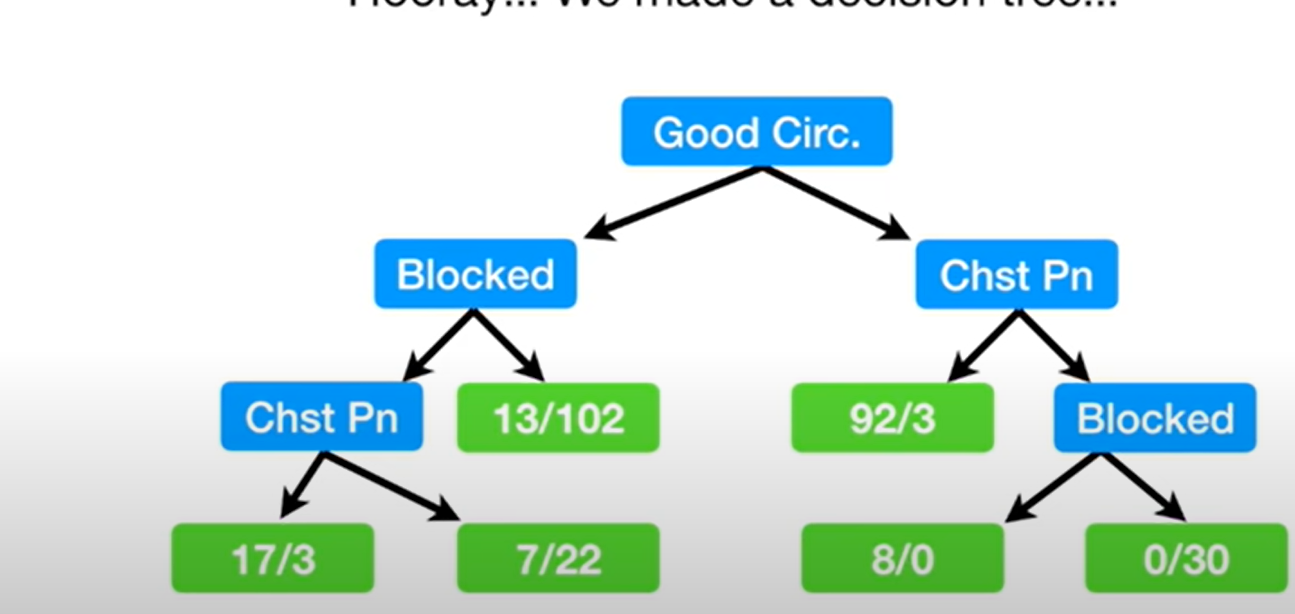

In [2]:
# pip install pydotplus

Note: you may need to restart the kernel to use updated packages.Collecting pydotplus



  DEPRECATION: pydotplus was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


Failed to build pydotplus
    Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


In [3]:
# pip install skompiler

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib>=0.11 in c:\programdata\anaconda3\lib\site-packages (from scikit-learn>=0.22->skompiler) (1.1.0)



Failed to build skompiler
    Running setup.py install for skompiler: started
    Running setup.py install for skompiler: finished with status 'done'



  DEPRECATION: skompiler was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [4]:
# pip install astor

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install joblib

In [ ]:
pip install graphviz

In [6]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

ModuleNotFoundError: No module named 'graphviz'